In [76]:
# from table_detection import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

In [84]:
# PARAMETERS
path = 'img/'
proc_path = 'proc_img/'
filename = 'image02.png'
sp_filename = filename.split('.')
proc_filename = sp_filename[0] + '_proc.' + sp_filename[1]
plt.style.use('dark_background')

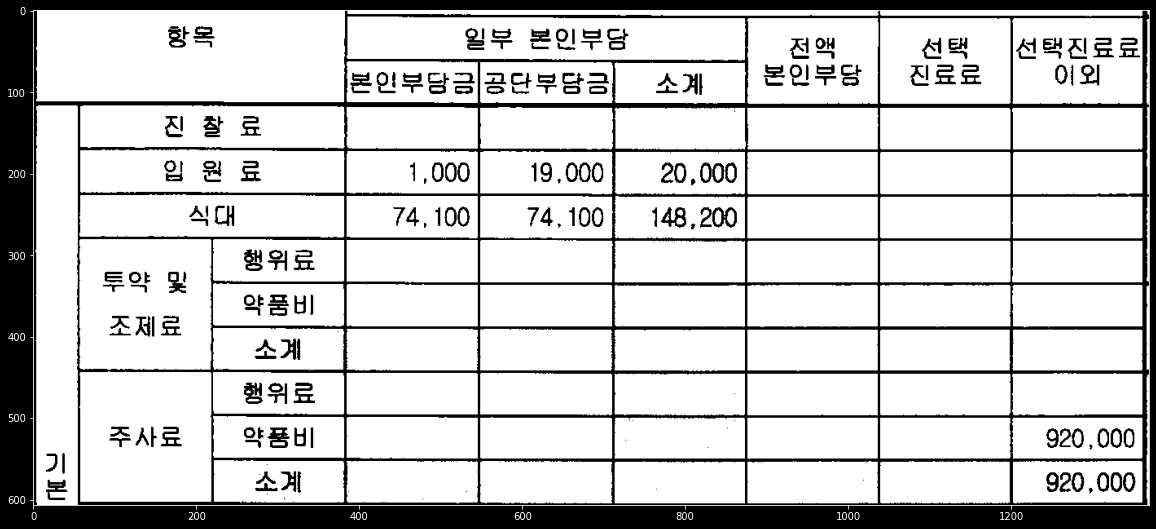

In [97]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_dim = img.shape

# 이진화
bi_thr = 200
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)
cv2.imwrite(proc_path+proc_filename, bi_img)
plt.figure(figsize=[20, 10])
plt.imshow(bi_img, cmap='gray')
plt.show()

In [100]:
bi_img.shape

(607, 1370)

In [101]:
row_mean = list()
row_max = list()
row_min = list()
row_idx = [i for i in range(bi_img.shape[0])]
for row_id in row_idx:
    row = bi_img[row_id, :]
    row_mean.append(np.mean(row))
    row_max.append(np.max(row))
    row_min.append(np.min(row))

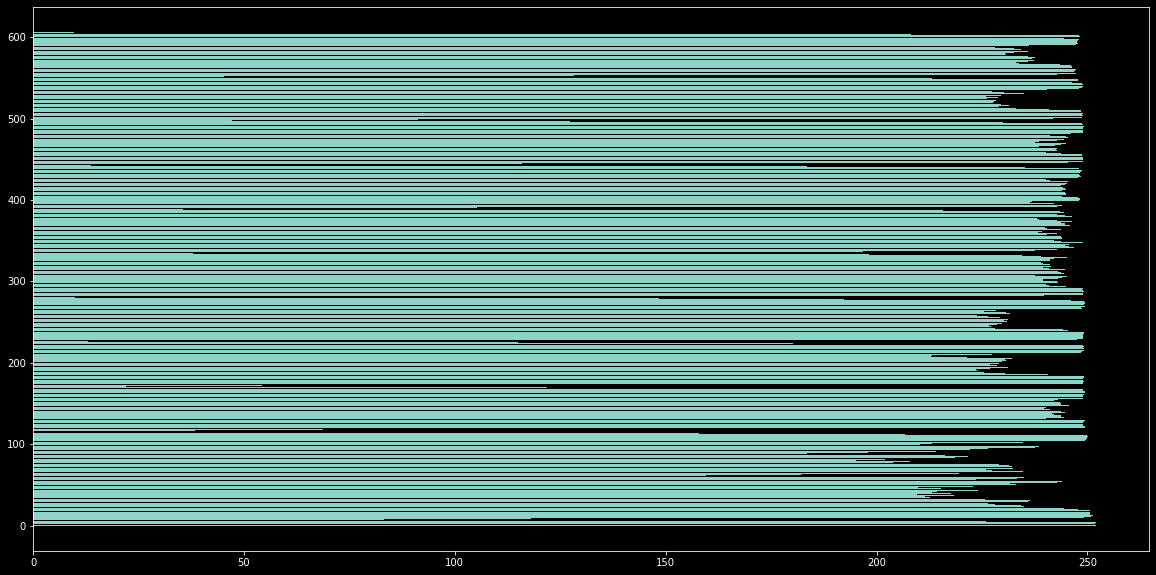

In [102]:
plt.figure(figsize=[20, 10])
plt.barh(y=row_idx, width=row_mean)
plt.show()

* 텍스트를 포함한 row id 구하기

In [195]:
min_thr = 220
max_thr = 240
text_row_idx = list()
for idx, value in enumerate(row_mean):
    if min_thr <= value < max_thr:
        text_row_idx.append(idx)
    else:
        pass

* 경계선 구하기

In [196]:
text_row_diff = list()
for n, row_id in enumerate(text_row_idx):
    if n == len(text_row_idx) - 1:
        text_row_diff.append(0)
    else:
        diff = text_row_idx[n+1] - text_row_idx[n]
        text_row_diff.append(diff)
text_row_idx_diff = dict(zip(text_row_idx, text_row_diff))

* row 범위 구하기

0 - 5: 33


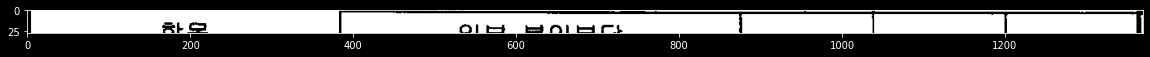

1 - 33: 76


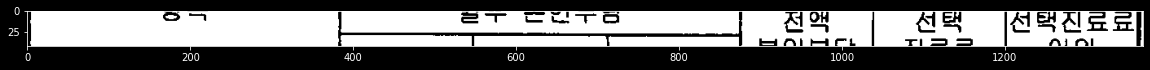

2 - 76: 85


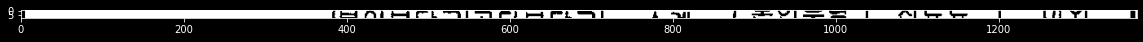

3 - 85: 102


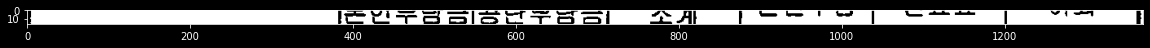

4 - 102: 144


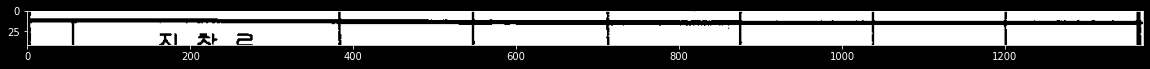

5 - 144: 153


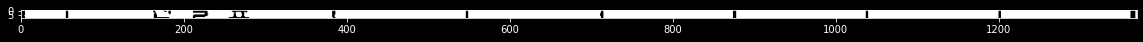

6 - 153: 168


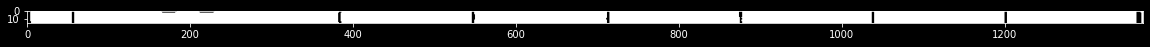

7 - 168: 210


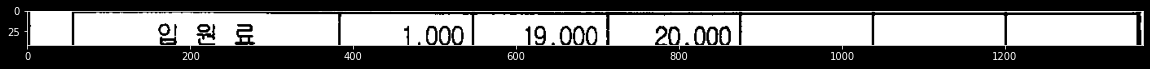

8 - 210: 223


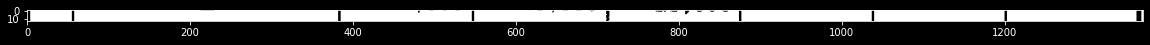

9 - 223: 265


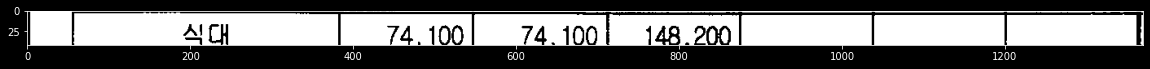

10 - 265: 283


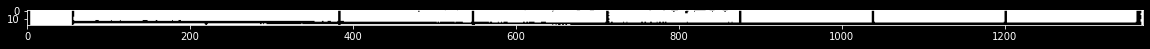

11 - 283: 338


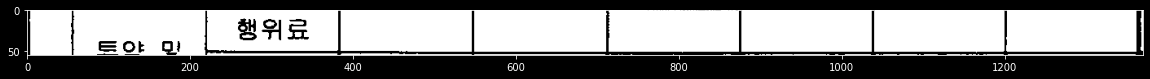

12 - 338: 366


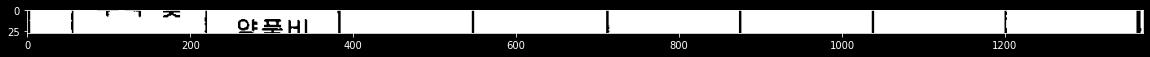

13 - 366: 377


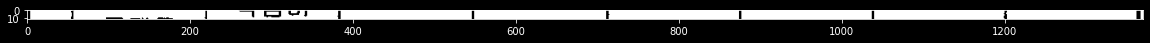

14 - 377: 398


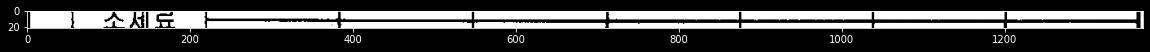

15 - 398: 440


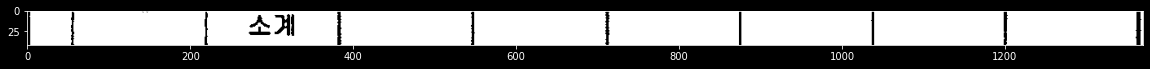

16 - 440: 481


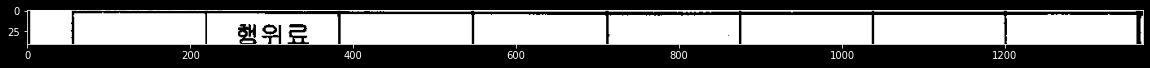

17 - 481: 495


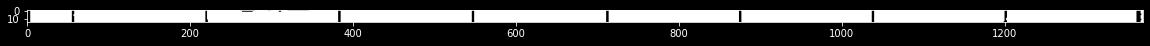

18 - 495: 535


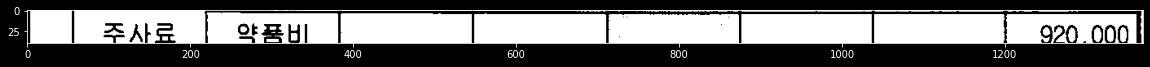

In [197]:
splitter = [i for i, v in text_row_idx_diff.items() if v >= 9]
for n, sp_id in enumerate(splitter):
    if n == len(splitter) - 1:
        pass
    else:
        sub_img = bi_img[splitter[n]: splitter[n+1]]
        plt.figure(figsize=(20, 10))
        print(f'{n} - {splitter[n]}: {splitter[n+1]}')
        plt.imshow(sub_img, cmap='gray')
        plt.show()

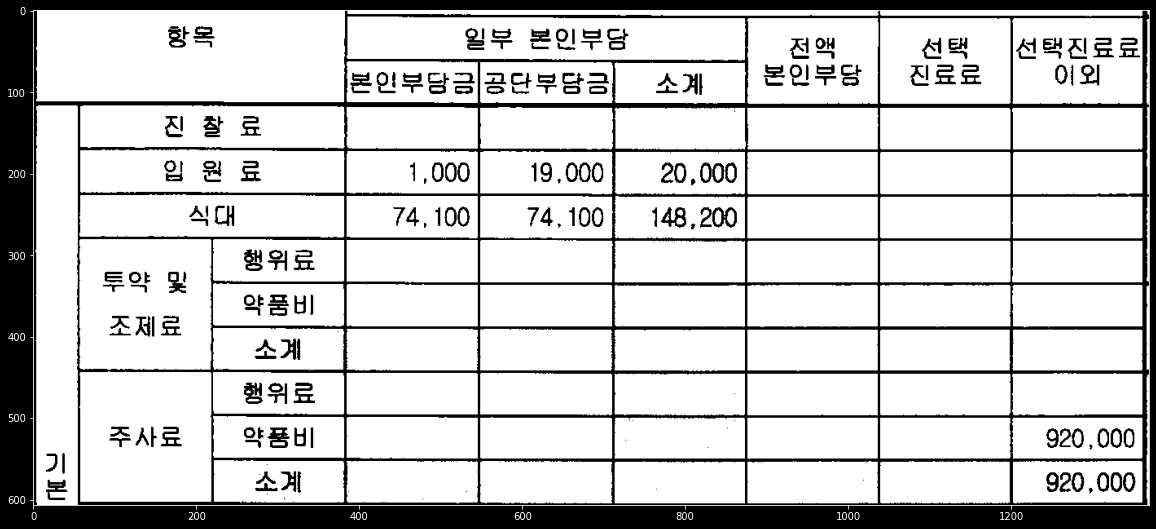

In [190]:
plt.figure(figsize=[20, 10])
plt.imshow(bi_img, cmap='gray')
plt.show()

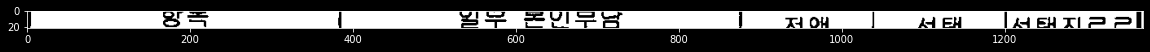

In [181]:
plt.figure(figsize=[20, 10])
plt.imshow(bi_img[26: 47], cmap='gray')

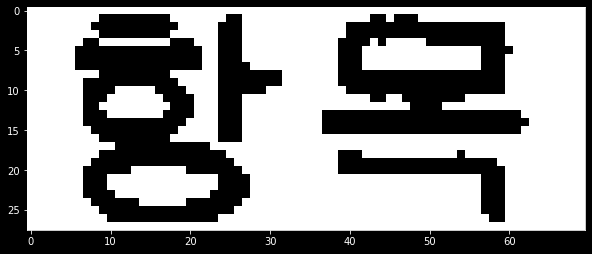

In [182]:
plt.figure(figsize=[10, 10])
plt.imshow(bi_img[19: 47, 160: 230], cmap='gray')